In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [1]:
# The exact function of dq/dt:
def q_dot(q, C=1, V=1, R=1):
    return (C*V - q)/(R*C)


def euler_algorithm(q0, f, h, time):
    ys = np.zeros(len(time)+1)
    ys[0] = q0
    for i in range(len(ys)-1):
        ys[i+1] = ys[i] + h * f(ys[i])
    return ys


# Analytical solution as calculated in the report:
def analytical_solution(t, C=1, V=1, R=1):
    return C*V * (1 - np.exp(-t/(R*C)))

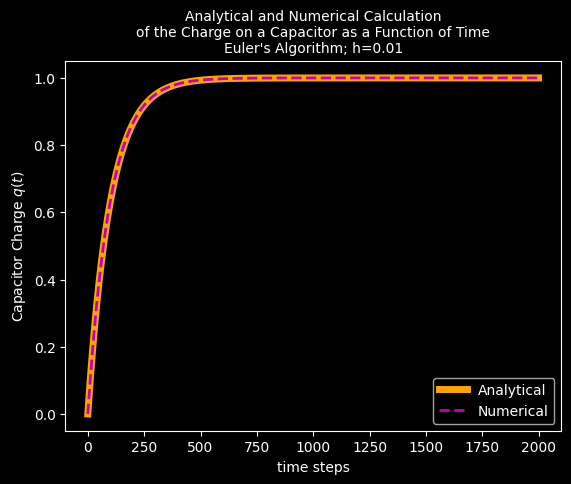

In [170]:
# Reduced Constants:
R = 1
C = 1
V = 1
# Initial Value of the Charge on the Capacitor:
q0 = 0
h = 0.01
time = np.arange(0, 20, h)
fig, ax = plt.subplots()
ax.plot(analytical_solution(t=time, C=C, V=V, R=R), label="Analytical", lw=5, color="orange")
ax.plot(euler_algorithm(q0=q0, f=q_dot, h=h, time=time), "m--", label="Numerical", lw=2)
ax.set_title("Analytical and Numerical Calculation\nof the Charge on a Capacitor as a Function of Time\nEuler's Algorithm; h=0.01",
             fontsize=10)
ax.set_xlabel("time steps")
ax.set_ylabel("Capacitor Charge $q(t)$")
ax.legend();

In [171]:
# fig.savefig("Capacitor1.jpg")

In [133]:
# This cell takes 15 seconds to execute:
num_samples = 20
hs = np.logspace(-7, -5, num_samples)
error = np.zeros(num_samples)
for i in range(num_samples):
    time = np.arange(0, 0.5, hs[i])
    error[i] = np.abs(analytical_solution(t=time)[-1] - euler_algorithm(q0=0, f=q_dot, h=hs[i], time=time)[-1])

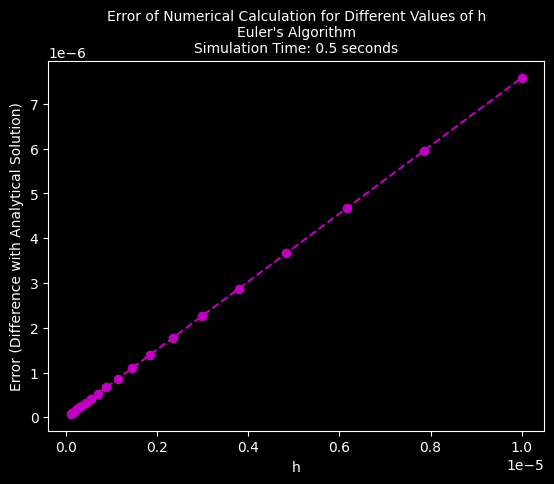

In [161]:
fig, ax = plt.subplots()

# ax.scatter(x=hs, y=error, c="orange", s=5, linestyle="--")
ax.plot(hs, error, color="m", linestyle="--", marker="o")
ax.set_title("Error of Numerical Calculation for Different Values of h\nEuler's Algorithm\nSimulation Time: 0.5 seconds",
             fontsize=10)
ax.set_xlabel("h")
ax.set_ylabel("Error (Difference with Analytical Solution)");

In [162]:
fig.savefig("Capacitor2_Error.jpg")